In [14]:
import pandas as pd
game = pd.read_csv("Kanika_12Mar.csv")
BallData = game.loc[game.DataLabel== 'BallData']

In [36]:
Data = BallData[['BallLevelNo','Ball_ID','Ball_Spawn_TimeStampLocal','BallHitType','Destroy_TimeStampLocal','BallGazeInWave','Ball_Color','Ball_SpawnZone']]
Data[['AlphabetID','Numberid']] = Data['Ball_ID'].str.extract('([b])(\d)')
Data['newColumn'] = Data.AlphabetID.isna()

#Multiple Balls in Whole Game 
Series = Data.loc[Data.newColumn == True]
Series['Ball_ID'] = pd.to_numeric(Series['Ball_ID'], errors='coerce')
Series_Frame = Series.sort_values('Ball_ID')

#First Ball in Multiple Balls
First_Ball_In_Series = Series_Frame.loc[Series.Ball_ID % 10 == 0]

#All Single Balls with Blue,Yellow and Red in Whole Game
Single = Data.loc[Data.newColumn == False]
Single_Frame = Single.sort_values('Ball_Spawn_TimeStampLocal')
List_of_Frames = [First_Ball_In_Series,Single_Frame]

#Converting "List of Frames" to a Single Frame
Frame = pd.concat(List_of_Frames)
Game_DataFrame = Frame.copy()
Game_DataFrame = Game_DataFrame.sort_values('Ball_Spawn_TimeStampLocal')




c:\users\loop reality\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
c:\users\loop reality\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\users\loop reality\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [37]:
balldata_level1 = Game_DataFrame.loc[Game_DataFrame['BallLevelNo'] == 1.0]
balldata_level1_suc = balldata_level1.loc[balldata_level1['BallHitType'] == 'CompleteSuccess']
count_one = len(balldata_level1_suc['BallHitType'])
Level_one_Success  = round((count_one/139)*100,2)


balldata_level2 = Game_DataFrame.loc[Game_DataFrame['BallLevelNo'] == 2.0]
balldata_level2_suc = balldata_level2.loc[balldata_level2['BallHitType'] == 'CompleteSuccess']
count_two = len(balldata_level2_suc['BallHitType'])
Level_two_Success  = round((count_two/78)*100,2)


balldata_level3 = Game_DataFrame.loc[Game_DataFrame['BallLevelNo'] == 3.0]
balldata_level3_suc = balldata_level3.loc[balldata_level3['BallHitType'] == 'CompleteSuccess']
count_three = len(balldata_level2_suc['BallHitType'])
Level_three_Success  = round((count_three/71)*100,2)


balldata_level4 = Game_DataFrame.loc[Game_DataFrame['BallLevelNo'] == 4.0]
balldata_level4_suc = balldata_level4.loc[balldata_level4['BallHitType'] == 'CompleteSuccess']
count_four = len(balldata_level4_suc['BallHitType'])
Level_four_Success  = round((count_four/119)*100,2)

print('Level-One Success Rate is ',Level_one_Success)
print('Level-Two Success Rate is ',Level_two_Success)
print('Level-Three Success Rate is ',Level_three_Success)
print('Level-Four Success Rate is ',Level_four_Success)

Level-One Success Rate is  61.15
Level-Two Success Rate is  60.26
Level-Three Success Rate is  66.2
Level-Four Success Rate is  43.7


In [50]:
my_dict = { 'Level_one_Success' : 61.15,  'Level_two_Success' : 60.26, 'Level_three_Success' : 66.2, 'Level_four_Success': 43.7  }
my_dict

{'Level_four_Success': 43.7,
 'Level_one_Success': 61.15,
 'Level_three_Success': 66.2,
 'Level_two_Success': 60.26}

In [57]:
import seaborn as sns

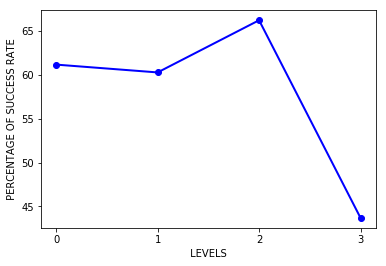

In [77]:
import matplotlib.pyplot as plt
lines = plt.plot([Level_one_Success,Level_two_Success,Level_three_Success,Level_four_Success])
plt.xlabel(' LEVELS ')
plt.xticks([0,1,2,3])
plt.ylabel(' PERCENTAGE OF SUCCESS RATE ')
plt.setp(lines, color='b', linewidth=2.0,marker='o')
plt.show()